In [1]:
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed

from sklearn.datasets import make_circles

from mpl_toolkits import mplot3d
from matplotlib.pyplot import subplots, axes, scatter, xticks


In [2]:
def make_torus_3D(n_samples=100, shuffle=True, noise=None, random_state=None,
                 factor=.8):
    """Make a large torus containing a smaller torus in 3d.

    A toy dataset to visualize clustering and classification
    algorithms.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated. If odd, the inner circle will
        have one point more than the outer circle.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    factor : 0 < double < 1 (default=.8)
        Scale factor between inner and outer circle.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """
    from numpy import pi, linspace, cos, sin, append, ones, zeros, hstack, vstack, intp
    from sklearn.utils import check_random_state, shuffle

    if factor >= 1 or factor < 0:
        raise ValueError("'factor' has to be between 0 and 1.")

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    co, ao, ci, ai = 3, 1, 3.6, 0.2
    generator = check_random_state(random_state)
    # to not have the first point = last point, we set endpoint=False
    linspace_out = linspace(0, 2 * pi, n_samples_out, endpoint=False)
    linspace_in  = linspace(0, 2 * pi, n_samples_in,  endpoint=False)
    outer_circ_x = (co+ao*cos(linspace_out)) * cos(linspace_out*61.1)
    outer_circ_y = (co+ao*cos(linspace_out)) * sin(linspace_out*61.1)
    outer_circ_z =    ao*sin(linspace_out)
    
    inner_circ_x = (ci+ai*cos(linspace_in)) * cos(linspace_in*61.1)* factor
    inner_circ_y = (ci+ai*cos(linspace_in)) * sin(linspace_in*61.1) * factor
    inner_circ_z =    ai*sin(linspace_in) * factor

    X = vstack([append(outer_circ_x, inner_circ_x),
                append(outer_circ_y, inner_circ_y),
                append(outer_circ_z, inner_circ_z)]).T
            
    y = hstack([zeros(n_samples_out, dtype=intp),
                   ones(n_samples_in, dtype=intp)])
    
    
    if shuffle:
        X, y = shuffle(X, y, random_state=generator)

    if noise is not None:
        X += generator.normal(scale=noise, size=X.shape)

    return X, y


In [3]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_STATE = 12345

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}


# Assignment

Take the torus-within-a-torus data generator from the __Challenge__. 

- Create data with three features and a noise level of 0.3. 

- Create a pseudo-3D scatter plot of one of the test data sets to judge the difficulty of the task. 

- Train the above introduced classifiers using the stratified shuffle split to generate 10 sets of testing and training data and obtain the average score for each classifier.

- Plot the feature importances obtained from the Random Forest classifier to see the contributions of each feature to the outcome. 

Note that with 3 or more features it is no longer possible to see the full state space in a plane. 

- Optional: Check how the outcome varies depending on

    - Choice of seed for random number generator
    - Number of data splits
    - Percentage of data withheld for testing

__Recommended__: Pick any of the provided (or other) data sets with labels to repeat the above. 

Feel free to try and do any testing or plotting that you find important. This is not an assignment to get the correct answer. Rather at this stage, we practise to use functionality from scikit-learn to search for structure in the data that helps to achieve the best predictions possible. 


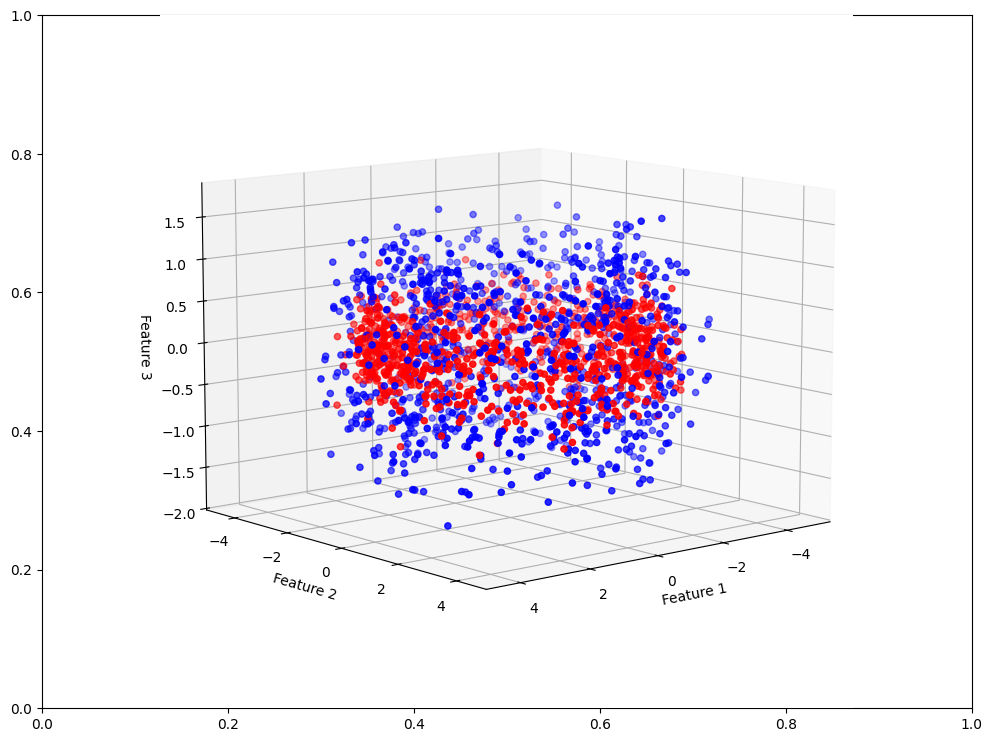

In [11]:
#Create 3D dataset and visualise it

RANDOM_STATE  = 12345
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=2000, factor=.9, noise=.3, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

fig, ax = subplots(figsize=(12, 9))

ax = axes(projection="3d")

im = ax.scatter3D(X[:, feature_1], X[:, feature_2], X[:, feature_3], marker='o', s=20, c=y, cmap='bwr');

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Angles to pick the perspective
ax.view_init(30, 50);
ax.view_init(10, 50);



In [18]:
X.shape

(2000, 3)

In [19]:
X

array([[ 3.39059318, -0.60413328,  0.00882006],
       [-2.27794016,  1.34486187, -0.32774821],
       [ 2.27014459, -3.32805518, -0.31617672],
       ...,
       [ 2.38347214, -2.45959577,  0.08688808],
       [ 2.47311867,  2.31679206,  0.58712464],
       [-2.13410504,  0.59417747,  0.57272472]])

In [20]:
#Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3) #change test_size if needed

In [21]:
sss

StratifiedShuffleSplit(n_splits=10, random_state=12345, test_size=0.3,
            train_size=None)

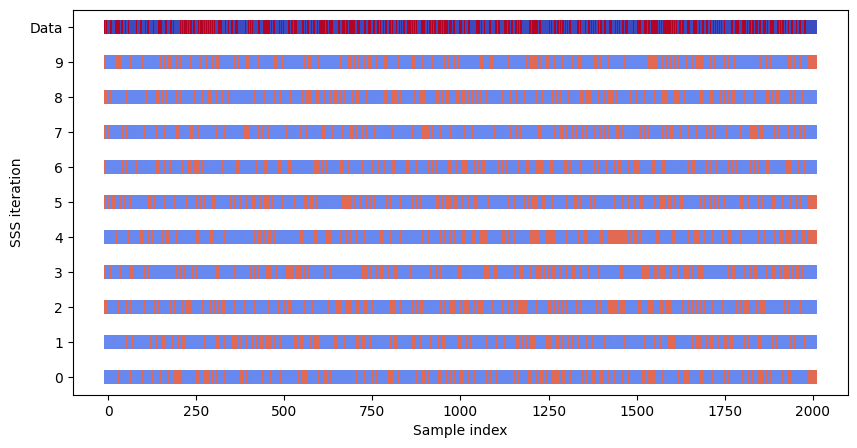

In [25]:
#Visualise the 10-time split data

from matplotlib.pyplot import show

fig, ax = subplots(figsize=[10, 5])

n_splits = sss.n_splits
split_data_indices = sss.split(X=X, y=y)

for index, (tr, tt) in enumerate(split_data_indices):
    indices = X[:, feature_1].copy()
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    x_axis = arange(indices.size)
    y_axis = [index + .5] * indices.size
    ax.scatter(x_axis, y_axis, c=indices, marker='_', lw=10, cmap='coolwarm', vmin=-.2, vmax=1.2)

# Plot the data classes and groups at the end
class_y = [index + 1.5] * indices.size
ax.scatter(x_axis, class_y, c=y, marker='_', lw=10, cmap='coolwarm')

# Formatting
ylabels = list(range(n_splits))
ylabels.extend(['Data'])

ax.set_yticks(arange(n_splits + 1) + .5)
ax.set_yticklabels(ylabels)
ax.set_xlabel('Sample index')
ax.set_ylabel('SSS iteration');

show()

N:\Development\pyML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
N:\Development\pyML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
N:\Development\pyML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
N:\Development\pyML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
N:\Development\pyML\lib\site-pac

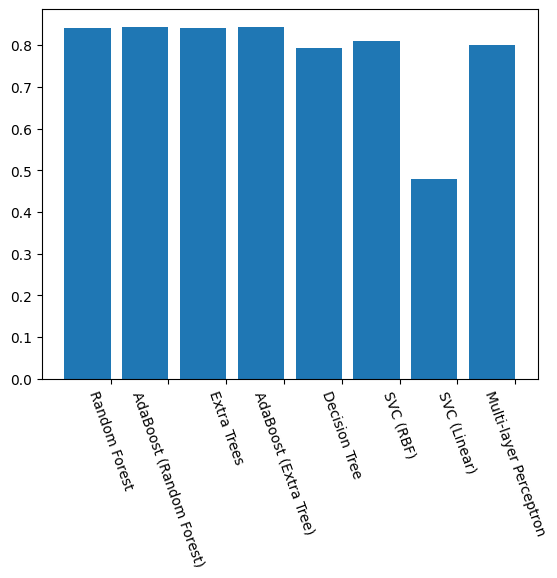

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.84', '0.84', '0.84', '0.84', '0.79', '0.81', '0.48', '0.80']


In [26]:
#Train each classifier


#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index]
    new_obs_s, y_test_s = X[test_index, :], y[test_index]

    score_clf = list()

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s)
        y_pred = clf.predict(new_obs_s)
        score_clf.append(clf.score(new_obs_s, y_test_s))

    score.append(score_clf)

score_mean = mean(score, axis=0)

bins = arange(len(score_mean))

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4)
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys())
print('Average scores: ')
print(["{0:0.2f}".format(ind) for ind in score_mean])

Features importances:
Feature 1: 26.2%; Feature 2: 26.4%, Feature 3: 47.5%



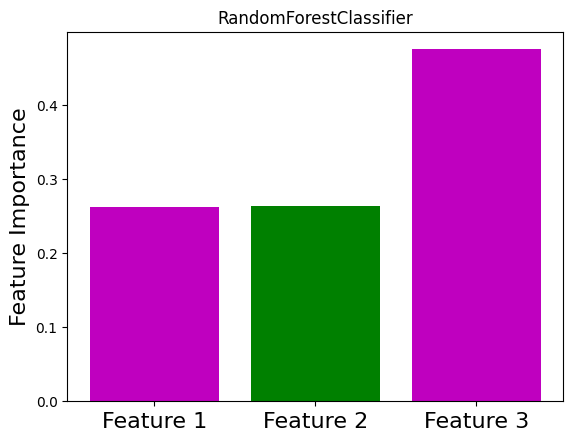

In [30]:
# Feature importance in the Random Forest Classifer

importances = classifiers['Random Forest'].feature_importances_

print('Features importances:')
template = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%, Feature 3: {:.1f}%'
print(template.format(importances[0]*100, importances[1]*100, importances[2]*100))
print('')

bins = arange(importances.shape[0])

fig, ax = subplots()

ax.bar(bins, importances, color=('m', 'g'));
xticks(bins, ('Feature 1', 'Feature 2','Feature 3'), fontsize=16);
ax.set_ylabel('Feature Importance', fontsize=16);
ax.set_title('RandomForestClassifier');

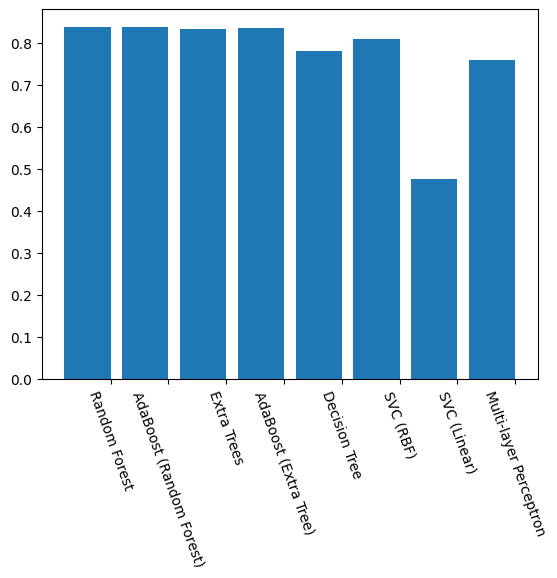

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.84', '0.84', '0.83', '0.83', '0.78', '0.81', '0.48', '0.76']


In [44]:
### Get rid of the warning messages. being annoying 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Change Choice of seed for random number generator

RANDOM_STATE  = 555
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=2000, factor=.9, noise=.3, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

#Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3) #change test_size if needed

#Train each classifier


#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index];
    new_obs_s, y_test_s = X[test_index, :], y[test_index];

    score_clf = list();

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s);
        y_pred = clf.predict(new_obs_s);
        score_clf.append(clf.score(new_obs_s, y_test_s));

    score.append(score_clf);

score_mean = mean(score, axis=0);

bins = arange(len(score_mean));

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4);
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys());
print('Average scores: ');
print(["{0:0.2f}".format(ind) for ind in score_mean]);

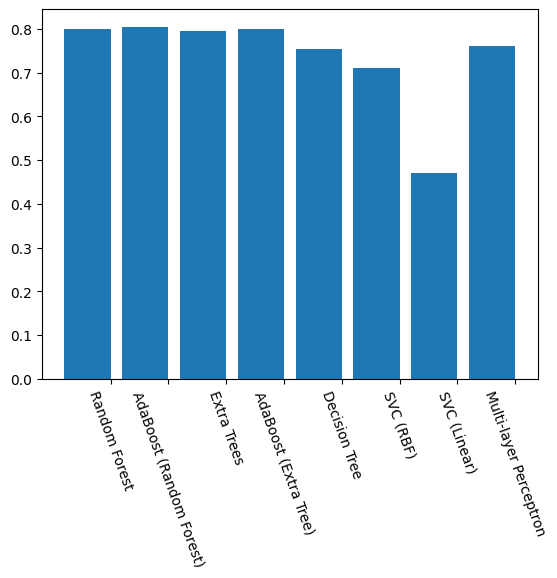

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.80', '0.80', '0.79', '0.80', '0.75', '0.71', '0.47', '0.76']


In [45]:
#### Change sample number

RANDOM_STATE  = 555
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=500, factor=.9, noise=.3, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

#Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3) #change test_size if needed

#Train each classifier


#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index];
    new_obs_s, y_test_s = X[test_index, :], y[test_index];

    score_clf = list();

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s);
        y_pred = clf.predict(new_obs_s);
        score_clf.append(clf.score(new_obs_s, y_test_s));

    score.append(score_clf);

score_mean = mean(score, axis=0);

bins = arange(len(score_mean));

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4);
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys());
print('Average scores: ');
print(["{0:0.2f}".format(ind) for ind in score_mean]);

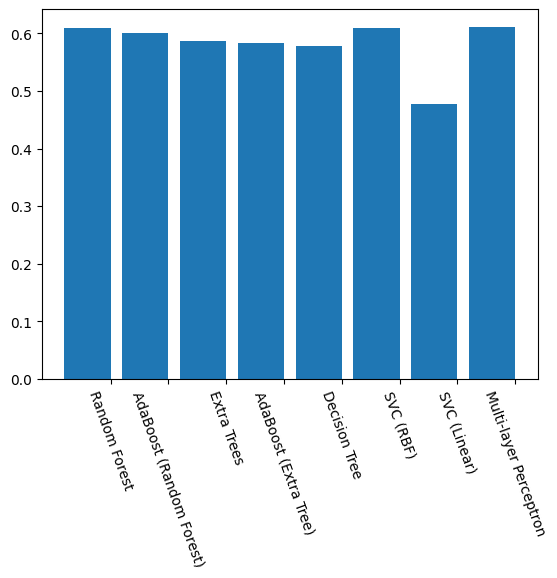

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.61', '0.60', '0.59', '0.58', '0.58', '0.61', '0.48', '0.61']


In [46]:
#### Change noise

RANDOM_STATE  = 555
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=500, factor=.9, noise=.6, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

#Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3) #change test_size if needed

#Train each classifier


#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index];
    new_obs_s, y_test_s = X[test_index, :], y[test_index];

    score_clf = list();

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s);
        y_pred = clf.predict(new_obs_s);
        score_clf.append(clf.score(new_obs_s, y_test_s));

    score.append(score_clf);

score_mean = mean(score, axis=0);

bins = arange(len(score_mean));

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4);
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys());
print('Average scores: ');
print(["{0:0.2f}".format(ind) for ind in score_mean]);

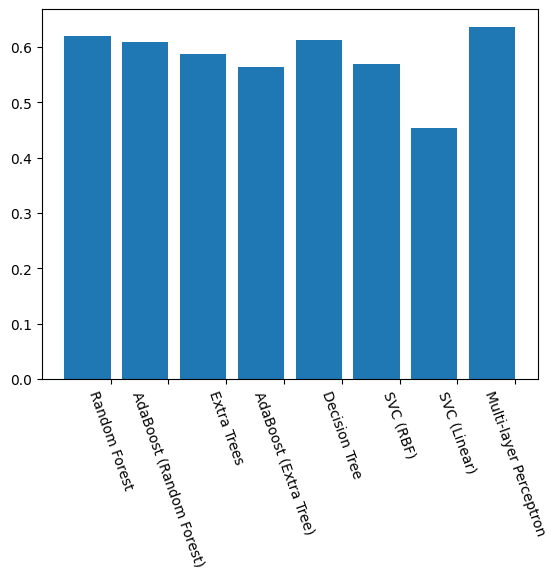

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.62', '0.61', '0.59', '0.56', '0.61', '0.57', '0.45', '0.64']


In [40]:
### Get rid of the warning messages. being annoying 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


##### Change Number of data splits

RANDOM_STATE  = 555
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=500, factor=.9, noise=.6, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

#Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=2, test_size=0.3) #change test_size if needed

#Train each classifier


#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index];
    new_obs_s, y_test_s = X[test_index, :], y[test_index];

    score_clf = list();

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s);
        y_pred = clf.predict(new_obs_s);
        score_clf.append(clf.score(new_obs_s, y_test_s));

    score.append(score_clf);

score_mean = mean(score, axis=0);

bins = arange(len(score_mean));

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4);
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys());
print('Average scores: ');
print(["{0:0.2f}".format(ind) for ind in score_mean]);



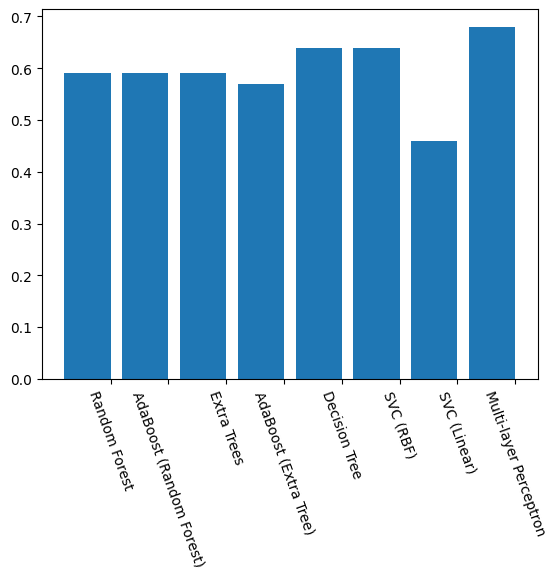

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.59', '0.59', '0.59', '0.57', '0.64', '0.64', '0.46', '0.68']


In [42]:
####### Change Percentage of data withheld for testing


RANDOM_STATE  = 555
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=500, factor=.9, noise=.6, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

#Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=2, test_size=0.1) #change test_size if needed

#Train each classifier


#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index];
    new_obs_s, y_test_s = X[test_index, :], y[test_index];

    score_clf = list();

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s);
        y_pred = clf.predict(new_obs_s);
        score_clf.append(clf.score(new_obs_s, y_test_s));

    score.append(score_clf);

score_mean = mean(score, axis=0);

bins = arange(len(score_mean));

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4);
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys());
print('Average scores: ');
print(["{0:0.2f}".format(ind) for ind in score_mean]);

In [43]:
print('Looks like the neural network model performs the best when data is limited and high noised, and test data is limited. Is it because',
      'it captures the most feature characteristics during traninig than all the other models?')

Looks like the neural network model performs the best when data is limited and high noised, and test data is limited. Is it because it captures the most feature characteristics during traninig than all the other models?


In [65]:
#### Try to use real-life data

# Import data
from pandas import read_csv

df_origin = read_csv('data/patients_data.csv')
df_origin.head(10)

df = df_origin.loc[:, ['Age', 'Systolic', 'Diastolic']]
df_np = df.to_numpy()

label = df_origin.loc[:, ['Smoker']]
label_np = label.to_numpy()

X = df_np
y = label_np



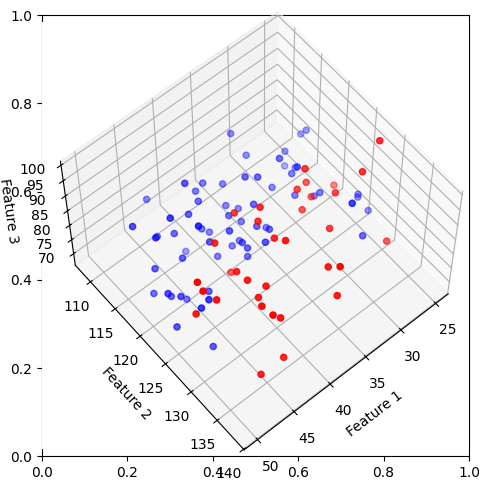

In [79]:
# Visualise the shape of the imported data


feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

fig, ax = subplots(figsize=(5, 5))

ax = axes(projection="3d")

im = ax.scatter3D(X[:, feature_1], X[:, feature_2], X[:, feature_3], marker='o', s=20, c=y, cmap='bwr');

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Angles to pick the perspective
ax.view_init(60, 50);

fig.tight_layout()

N:\Development\pyML\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
N:\Development\pyML\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
N:\Development\pyML\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
N:\Development\pyML\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

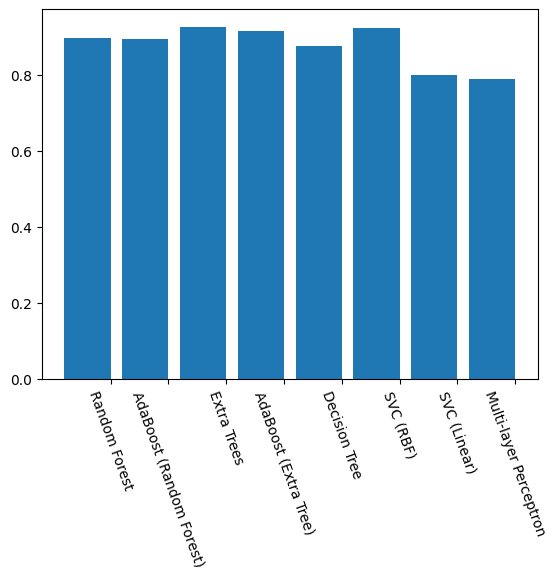

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.90', '0.89', '0.93', '0.92', '0.88', '0.92', '0.80', '0.79']


In [81]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Train the models and obtain scores

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3) #change test_size if needed

#Train each classifier

#split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index];
    new_obs_s, y_test_s = X[test_index, :], y[test_index];

    score_clf = list();

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s);
        y_pred = clf.predict(new_obs_s);
        score_clf.append(clf.score(new_obs_s, y_test_s));

    score.append(score_clf);

score_mean = mean(score, axis=0);

bins = arange(len(score_mean));

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4);
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys());
print('Average scores: ');
print(["{0:0.2f}".format(ind) for ind in score_mean]);

Features importances:
Feature 1: 18.2%; Feature 2: 41.0%, Feature 3: 40.8%



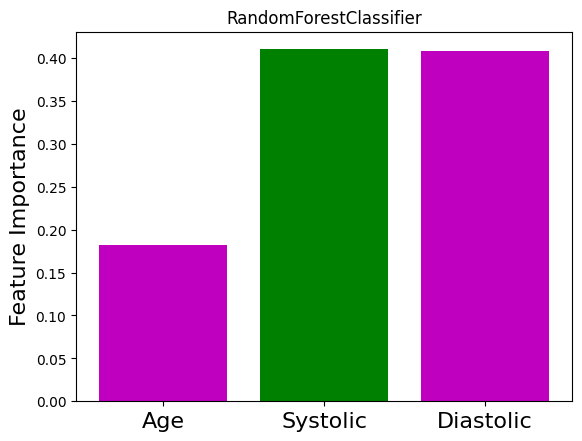

In [87]:
# Feature importance in the Random Forest Classifer

importances = classifiers['Random Forest'].feature_importances_

print('Features importances:')
template = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%, Feature 3: {:.1f}%'
print(template.format(importances[0]*100, importances[1]*100, importances[2]*100))
print('')

bins = arange(importances.shape[0])

fig, ax = subplots()

ax.bar(bins, importances, color=('m', 'g'));
xticks(bins, ('Age', 'Systolic','Diastolic'), fontsize=16);
ax.set_ylabel('Feature Importance', fontsize=16);
ax.set_title('RandomForestClassifier');